# Mean and Standard deviaton for vx,vy with theta random variable
Nicolas Rambaux <br>
10-Dec-2019

In [1]:
#import pymc3 as pm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 

#### Introduction to generate a set of random variables 

In [2]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [3]:
abs(mu - np.mean(s)) < 0.01

True

In [4]:
abs(sigma - np.std(s, ddof=1)) < 0.01

True

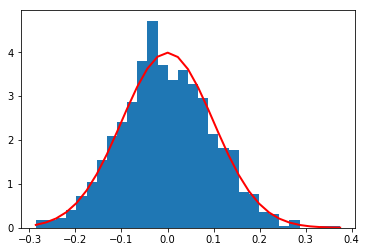

In [5]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

#### Code
Generation of theta angle <br>
computation of vx,vy (assuming v=1) <br> 
determination of theta from vx, vy by atan2 <br>
computaiton of the mean and standard deviation

In [71]:
# Ok no problem here
#mu, sigma = 10, 1 # mean and standard deviation
mu, sigma = 1, 5 # mean and standard deviation
#mu, sigma = 10, 10 # mean and standard deviation
# Trouble
#mu, sigma = 180, 10 # mean and standard deviation
#mu, sigma = 170, 10 # mean and standard deviation

theta = np.random.normal(mu, sigma, 1000)

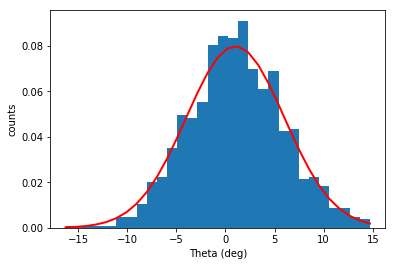

In [72]:
count, bins, ignored = plt.hist(theta, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.xlabel('Theta (deg)')
plt.ylabel('counts')
plt.show()

In [73]:
#print(bins)

#for bin in bins:
#    print(bin)


In [74]:
spi=1
print( (bins[0]-180)*(bins[len(bins)-1]-180))
if (bins[0]-180)*(bins[len(bins)-1]-180) < 0 :
    spi = -1
print(spi)

32444.470837930727
1


In [75]:
vx=np.cos(theta*np.pi/180)
vy=np.sin(theta*np.pi/180)

1000
1000


/APPLI/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


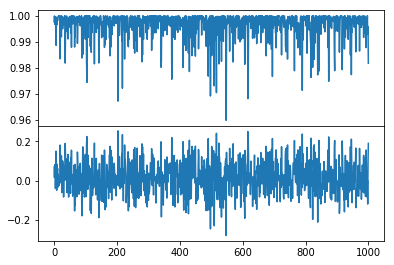

In [76]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])

print(len(vx))
x = np.linspace(0, len(vx),len(vx))
print(len(x))
ax1.plot(x,vx)
ax2.plot(x,vy);

fig.show()

1000
1000
0.9975774276288004
0.06956490412201669
0.0696211339523677


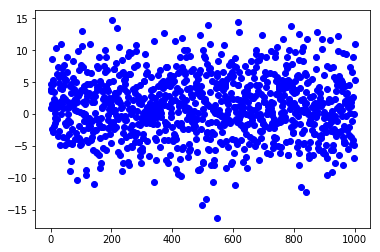

In [77]:
theta2=[]
for i in range(len(x)): 
    theta2.append(math.atan2(vy[i], spi*vx[i]))  
#    theta3[i]=math.atan2(vy[i], vx[i]) #this syntax has some trouble...

theta2=np.asarray(theta2).T
print(len(theta2))
print(len(x))
print(vx[0])
print(vy[0])
print(theta2[0])

plt.plot(x,theta2*180/np.pi,'bo')
plt.show()

In [78]:
mu_n=np.mean(theta2*180/np.pi)
std_n=np.std(theta2*180/np.pi)

if (spi==-1):
    mu_n = mu_n + 180

print("Mean ")
print("Numerical Mean: {}".format(mu_n))
print("Initial   Mean: {}".format(mu))
print("Relat.   diff.: {}".format( abs(mu_n-mu)/mu*100))
print("  ")
print("Std ")
print("Numerical Mean: {}".format(std_n))
print("Initial   Mean: {}".format(sigma))
print("Relat.   diff.: {}".format( abs(std_n-sigma)/sigma*100))


Mean 
Numerical Mean: 1.08820805632981
Initial   Mean: 1
Relat.   diff.: 8.820805632981
  
Std 
Numerical Mean: 4.849283539128235
Initial   Mean: 5
Relat.   diff.: 3.0143292174352965


#### The case mu=180, sigma=10 has some trouble has expected <br>
May be a solution is for this case to compute atan2 for vy and -vx and then to add 180° at the final solution (it is controlled by spi).
